In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import matplotlib.pyplot as plt

Train and test with 1k datapoints total

In [2]:
# Load the data. Flatten X to be 2D.
X = np.load('/workspace/data_gen/X.npy')
X = X.reshape(X.shape[0], -1)
y = np.load('/workspace/data_gen/y.npy')

#Randomly shuffle the data
np.random.seed(42)
np.random.shuffle(X)
np.random.seed(42)
np.random.shuffle(y)

# Split data into training and testing sets
X_train_1k, X_test_1k, y_train_1k, y_test_1k = train_test_split(X[:1000], y[:1000], test_size=0.2, random_state=42)

In [4]:
# Create linear regression object
reg = LinearRegression()

print("Training model...")

# Train the model using the training sets
reg.fit(X_train_1k, y_train_1k)

print("Evaluating model...""")

# Make predictions on the testing set
y_pred_1k = reg.predict(X_test_1k)

# Evaluate the performance of the model
mse = mean_squared_error(y_test_1k, y_pred_1k)
r2 = r2_score(y_test_1k, y_pred_1k)

print("Mean squared error: ", mse)
print("R-squared: ", r2)

Training model...
Evaluating model...
Mean squared error:  0.7209216693789287
R-squared:  0.2598253387581039


Train and test the model using all datapoints (6.5k)

In [2]:
# Load the data. Flatten X to be 2D.
X = np.load('/workspace/data_gen/X.npy')
X = X.reshape(X.shape[0], -1)
y = np.load('/workspace/data_gen/y.npy')

#Randomly shuffle the data
np.random.seed(42)
np.random.shuffle(X)
np.random.seed(42)
np.random.shuffle(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Create linear regression object
reg = LinearRegression()

print("Training model...")

# Train the model using the training sets
reg.fit(X_train, y_train)

print("Evaluating model...""")

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared: ", r2)

Training model...
Evaluating model...
Mean squared error:  0.5508680435841927
R-squared:  0.42484153849614364


Visualize the results from this best model

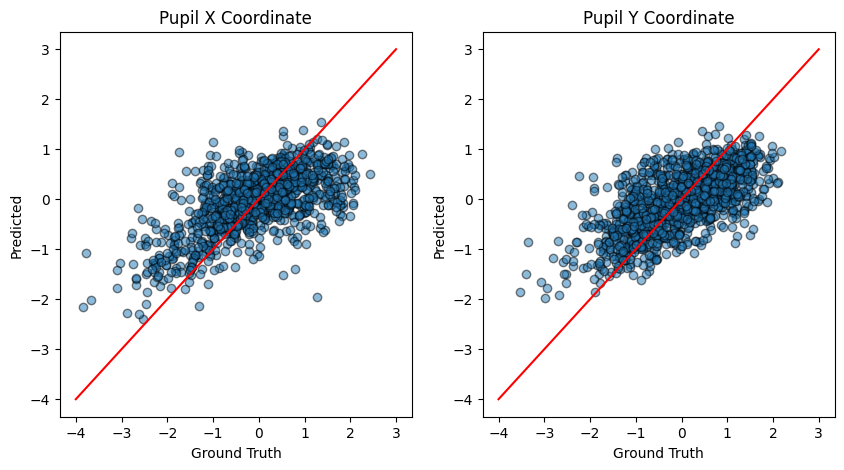

In [7]:
#Plot two subplots. The first shows the predicted vs. ground truth for the first dimension,
#and the second shows the predicted vs. ground truth for the second dimension.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#Add a border to each plotted dot and make the dots slightly transparent
ax1.scatter(y_test[:,0], y_pred[:,0], edgecolors='k', alpha=0.5)
ax1.plot([-4, 3], [-4, 3], c='r')
ax1.set_xlabel('Ground Truth')
ax1.set_ylabel('Predicted')
ax1.set_title('Pupil X Coordinate')
ax2.scatter(y_test[:,1], y_pred[:,1], edgecolors='k', alpha=0.5)
ax2.plot([-4, 3], [-4, 3], c='r')
ax2.set_xlabel('Ground Truth')
ax2.set_ylabel('Predicted')
ax2.set_title('Pupil Y Coordinate')
plt.show()

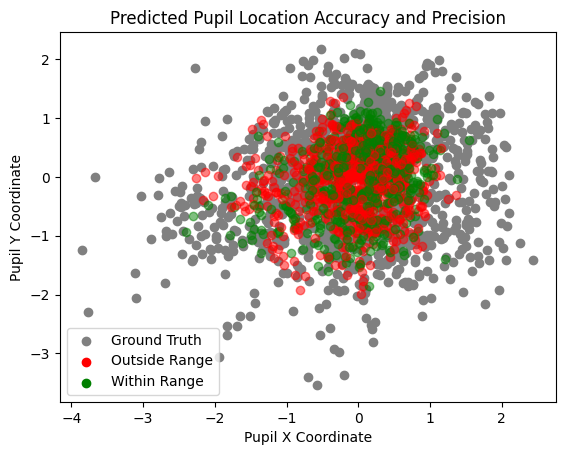

Number of green points: 583
Number of red points: 717


In [9]:
#The first dimension is the x coordinate, and the second dimension is the y coordinate.
#Plot a superimposed 2D plot of the predicted and ground truth values.
#Plot the ground truth values as grey points
plt.scatter(y_test[:,0], y_test[:,1], c='grey', label='Ground Truth')

num_green = 0
num_red = 0

#Plot the predicted values with a slight translucency.
#Plot them as green points if they are within sqrt(1) units of the ground truth, and as red points otherwise.
for i in range(len(y_test)):
    if np.linalg.norm(y_test[i] - y_pred[i]) < np.sqrt(2)/2:
        plt.scatter(y_pred[i,0], y_pred[i,1], c='green', alpha=0.5)
        num_green += 1
    else:
        plt.scatter(y_pred[i,0], y_pred[i,1], c='red', alpha=0.5)
        num_red += 1

plt.scatter([], [], c='red', label='Outside Range')
plt.scatter([], [], c='green', label='Within Range')

plt.xlabel('Pupil X Coordinate')
plt.ylabel('Pupil Y Coordinate')
plt.title('Predicted Pupil Location Accuracy and Precision')
plt.legend()
plt.show()

print('Number of green points: {}'.format(num_green))
print('Number of red points: {}'.format(num_red))

Train the model using the supernodes only

In [6]:
supernodes = np.load('/workspace/models/supernode_indices_allcoords.npy')
print(supernodes.shape)

X = np.load('/workspace/data_gen/X.npy')[:, supernodes, :]
X = X.reshape(X.shape[0], -1)
y = np.load('/workspace/data_gen/y.npy')

(457,)


In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
reg = LinearRegression()

print("Training model...")

# Train the model using the training sets
reg.fit(X_train, y_train)

print("Evaluating model...""")

# Make predictions on the testing set
y_pred = reg.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("R-squared: ", r2)

Training model...
Evaluating model...
Mean squared error:  1.3965692093321773
R-squared:  -0.32838095929722777
